                                Handling Categorical Data in Python                                        

# Handling Categorical Data in Python

Categorical data refers to features that contain a fixed set of possible values or categories that data points can belong to. Handling categorical data correctly is important because improper handling can lead to inaccurate analysis and poor model performance. In this notebook, we will see how to handle categorical data and its related concepts.

### Why Do We Need to Handle Categorical Data?

* **Algorithms Require Numerical Inputs:** Most machine learning algorithms cannot directly process categorical data and need it to be converted into numerical formats
* **Improved Model Performance:** Proper encoding of categorical variables can lead to better model performance and accuracy.
* **Avoiding Misinterpretation:** Treating categorical data as numerical can lead to misinterpretation of relationships between variables.
* **Dimensionality Reduction:** Handling categorical data effectively can help reduce the dimensionality of the dataset, making it easier to analyze and visualize.
* **Inconsistence categorical values:** Categorical data may contain inconsistencies, such as different spellings or capitalizations of the same category, which need to be standardized.
* **Handle real-world data:** Real-world datasets often contain categorical variables, and handling them correctly is essential for building robust models.




## Implementation for Handling Categorical Data

#### Step 1: Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#### Step 2: Loading the Dataset

In [4]:
dataset = "https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/demographics.csv"
main_data = pd.read_csv(dataset)
print(main_data.head())

  first_name last_name blood_type marriage_status  income     device
0      Abdul     Colon         A+         married  145000  AndroidOS
1      Abdul    Pierce         B+         married   85000      MacOS
2    Desirae    Pierce         B+         MARRIED  130000        iOS
3    Shannon    Gibson         A+         married  175000      MacOS
4    Desirae    Little         B+      unmarried   130000      MacOS


#### Step 3: Identifying and Removing Bogus Blood Types

In [5]:
valid_blood_type_list = ['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-']
blood_type_categories = pd.DataFrame({'blood_type': valid_blood_type_list})
print(blood_type_categories)

  blood_type
0         A+
1         A-
2         B+
3         B-
4        AB+
5        AB-
6         O+
7         O-


In [6]:
# Lets find bogus blood types by comparing the dataset values to this valid list:
unique_blood_types_main = set(main_data['blood_type'])
valid_blood_types_set = set(blood_type_categories['blood_type'])  
bogus_blood_types = unique_blood_types_main.difference(valid_blood_types_set)
bogus_blood_types

{'C+', 'D-'}

In [7]:
# Drop them
bogus_records_index = main_data['blood_type'].isin(bogus_blood_types)

without_bogus_records = main_data[~bogus_records_index].copy()
without_bogus_records['blood_type'].unique()

array(['A+', 'B+', 'A-', 'AB-', 'AB+', 'B-', 'O-', 'O+'], dtype=object)

#### Step 4: Handling Inconsistent Marriage Status Categories

In [8]:
main_data['marriage_status'].unique()

array(['married', 'MARRIED', ' married', 'unmarried ', 'divorced',
       'unmarried', 'UNMARRIED', 'separated'], dtype=object)

Standardizing the categories by converting all text to lowercase.

In [9]:
inconsistent_data = main_data.copy()
inconsistent_data['marriage_status'] = inconsistent_data['marriage_status'].str.lower()
inconsistent_data['marriage_status'].unique()

array(['married', ' married', 'unmarried ', 'divorced', 'unmarried',
       'separated'], dtype=object)

Now we will standardize the categories by stripping extra spaces:

In [10]:
inconsistent_data['marriage_status'] = inconsistent_data['marriage_status'].str.strip()

inconsistent_data['marriage_status'].unique()

array(['married', 'unmarried', 'divorced', 'separated'], dtype=object)

#### Step 5: Grouping Income into Meaningful Bins

In [11]:
print(f"Max income - {main_data['income'].max()}, Min income - {main_data['income'].min()}")

Max income - 190000, Min income - 40000


Now, let us create the range and labels for the income feature. Pandas cut method is used here

In [12]:
income_bins = [40000, 75000, 100000, 125000, 150000, np.inf]
income_labels = ['40k-75k', '75k-100k', '100k-125k', '125k-150k', '150k+']

remapping_data = main_data.copy()
remapping_data['income_groups'] = pd.cut(
    remapping_data['income'],
    bins=income_bins,
    labels=income_labels
)

remapping_data.head()

,first_name,last_name,blood_type,marriage_status,income,device,income_groups
0,Abdul,Colon,A+,married,145000,AndroidOS,125k-150k
1,Abdul,Pierce,B+,married,85000,MacOS,75k-100k
2,Desirae,Pierce,B+,MARRIED,130000,iOS,125k-150k
3,Shannon,Gibson,A+,married,175000,MacOS,150k+
4,Desirae,Little,B+,unmarried,130000,MacOS,125k-150k


#### Step 6: Visualizing Income Group Distribution

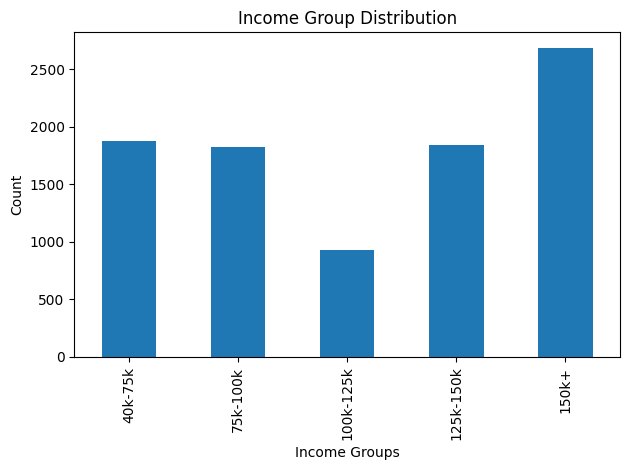

In [13]:
remapping_data['income_groups'].value_counts().sort_index().plot.bar()
plt.title('Income Group Distribution')
plt.xlabel('Income Groups')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### Step 7: Cleaning Phone Number Data

In [14]:
import random
phone_numbers = []

for i in range(100):
    number = random.randint(100000000, 9999999999)  # length can be 9 or 10 digits
    if i % 2 == 0:
        phone_numbers.append('+91 ' + str(number))  # add +91 prefix for some
    else:
        phone_numbers.append(str(number))

phone_numbers_data = pd.DataFrame({
    'phone_numbers': phone_numbers
})

phone_numbers_data.head()

,phone_numbers
0,+91 9257170922
1,9891260788
2,+91 7875185788
3,8363117202
4,+91 8687227015


Standardizing phone numbers by removing special characters and ensuring a consistent format.

In [15]:
phone_numbers_data['phone_numbers'] = phone_numbers_data['phone_numbers'].str.replace(r'\+91 ', '', regex=True)

num_digits = phone_numbers_data['phone_numbers'].str.len()

invalid_numbers_index = phone_numbers_data[num_digits < 10].index
phone_numbers_data.drop(invalid_numbers_index, inplace=True)

phone_numbers_data.dropna(inplace=True)
phone_numbers_data.reset_index(drop=True, inplace=True)

phone_numbers_data.head()

,phone_numbers
0,9257170922
1,9891260788
2,7875185788
3,8363117202
4,8687227015


Verify Numbers

In [16]:
assert not phone_numbers_data['phone_numbers'].str.contains(r'\+91 ').any(), "Found phone numbers with '+91 ' prefix"
assert (phone_numbers_data['phone_numbers'].str.len() == 10).all(), "Some phone numbers do not have 10 digits"

#### Step 8: Visualizing Categorical Data

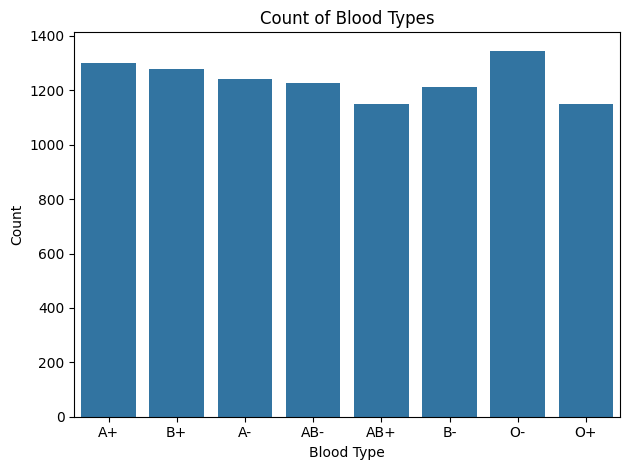

In [17]:
import seaborn as sns
sns.countplot(x='blood_type', data=without_bogus_records)
plt.title('Count of Blood Types')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

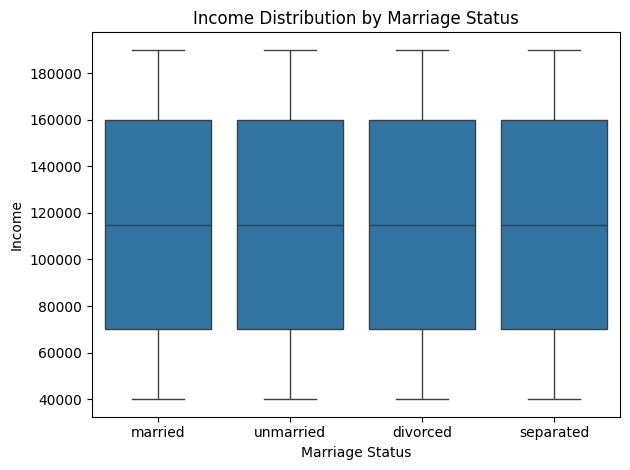

In [18]:
sns.boxplot(x='marriage_status', y='income', data=inconsistent_data)

plt.title('Income Distribution by Marriage Status')
plt.xlabel('Marriage Status')
plt.ylabel('Income') 
plt.tight_layout()
plt.show()

#### Step 9: Encoding Categorical Data

#### 1. Label Encoding

With label encoding we can number the categories from 0 to num_categories - 1. Let us apply label encoding on the blood type feature.

In [19]:
le = LabelEncoder()
without_bogus_records['blood_type_encoded'] = le.fit_transform(without_bogus_records['blood_type'])

without_bogus_records[['blood_type', 'blood_type_encoded']].drop_duplicates()

,blood_type,blood_type_encoded
0,A+,0
1,B+,4
5,A-,1
7,AB-,3
9,AB+,2
10,B-,5
12,O-,7
21,O+,6


#### 2. One-hot Encoding in Python

There are certain limitations of label encoding that are taken care of by one-hot encoding. Some of them are:

* Creates a false order: It gives numbers like 0, 1, 2 to categories which may make models think one category is bigger or better than the other.
* Misleads models: Algorithms like linear regression or decision trees might assume there's a ranking which can reduce accuracy.
* Problem with distance-based models: In models like KNN or K-Means, the numeric labels can wrongly influence distance calculations.
* Bias in training: Some models may give more importance to higher label values, even if all categories are equal.
* Not suitable for nominal data: Label encoding is not a good choice when categories have no natural order, like colors or city names.

In [20]:
inconsistent_data = pd.get_dummies(inconsistent_data, columns=['marriage_status'])
inconsistent_data.head()

,first_name,last_name,blood_type,income,device,marriage_status_divorced,marriage_status_married,marriage_status_separated,marriage_status_unmarried
0,Abdul,Colon,A+,145000,AndroidOS,False,True,False,False
1,Abdul,Pierce,B+,85000,MacOS,False,True,False,False
2,Desirae,Pierce,B+,130000,iOS,False,True,False,False
3,Shannon,Gibson,A+,175000,MacOS,False,True,False,False
4,Desirae,Little,B+,130000,MacOS,False,False,False,True


#### 3. Ordinal Encoding in Python

Categorical data can be ordinal where the order is of importance. For such features, we want to preserve the order after encoding as well. We will perform ordinal encoding on income groups. We want to preserve the order as 40K-75K < 75K-100K < 100K-125K < 125K-150K < 150K+

In [21]:
custom_map = {
    '40k-75k': 1,
    '75k-100k': 2,
    '100k-125k': 3,
    '125k-150k': 4,
    '150k+': 5
}

remapping_data['income_groups_encoded'] = remapping_data['income_groups'].map(custom_map)

remapping_data[['income', 'income_groups', 'income_groups_encoded']].head()

,income,income_groups,income_groups_encoded
0,145000,125k-150k,4
1,85000,75k-100k,2
2,130000,125k-150k,4
3,175000,150k+,5
4,130000,125k-150k,4


# With these techniques we can prepare categorical data for meaningful analysis and effective machine learning models.